In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [70]:
df=pd.read_csv(r'C:\Users\SDS\Downloads\Social_Network_Ads.csv',usecols=['Age','EstimatedSalary','Purchased'])
df # i use (usecols) parameter for extracting main columns from data set 

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [71]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [72]:
# x,y extract from dataset
x=df.drop(columns=['Purchased'])
y=df['Purchased']

In [73]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

In [74]:
# apply Train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
# apply Standard scaler
scaler=StandardScaler()
# fit the scaled on train set ,it will learn parameters_
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)



In [76]:
scaler.mean_

array([3.7871875e+01, 7.0281250e+04])

In [77]:
print(x_train,x_train_scaled)

     Age  EstimatedSalary
3     27            57000
18    46            28000
202   39           134000
250   44            39000
274   57            26000
..   ...              ...
71    24            27000
106   26            35000
270   43           133000
348   39            77000
102   32            86000

[320 rows x 2 columns] [[-1.06675246 -0.38634438]
 [ 0.79753468 -1.22993871]
 [ 0.11069205  1.853544  ]
 [ 0.60129393 -0.90995465]
 [ 1.87685881 -1.28811763]
 [-0.57615058  1.44629156]
 [ 0.3069328  -0.53179168]
 [ 0.99377543  0.10817643]
 [-1.16487283  0.45724994]
 [-1.55735433  0.31180264]
 [ 1.0918958   0.45724994]
 [-0.18366908 -0.47361276]
 [ 0.20881242 -0.32816546]
 [ 0.3069328   0.28271318]
 [-1.16487283 -1.57901222]
 [ 0.11069205  0.25362372]
 [ 2.07309956  1.73718616]
 [ 0.40505317 -0.18271817]
 [ 1.4843773   2.11534913]
 [-0.37990983  1.21357589]
 [ 1.87685881  1.50447048]
 [ 0.11069205  0.02090805]
 [ 0.89565505 -1.31720709]
 [-1.36111358 -1.49174384]
 [-0.18366908 -0

In [78]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)


effecting of scalling


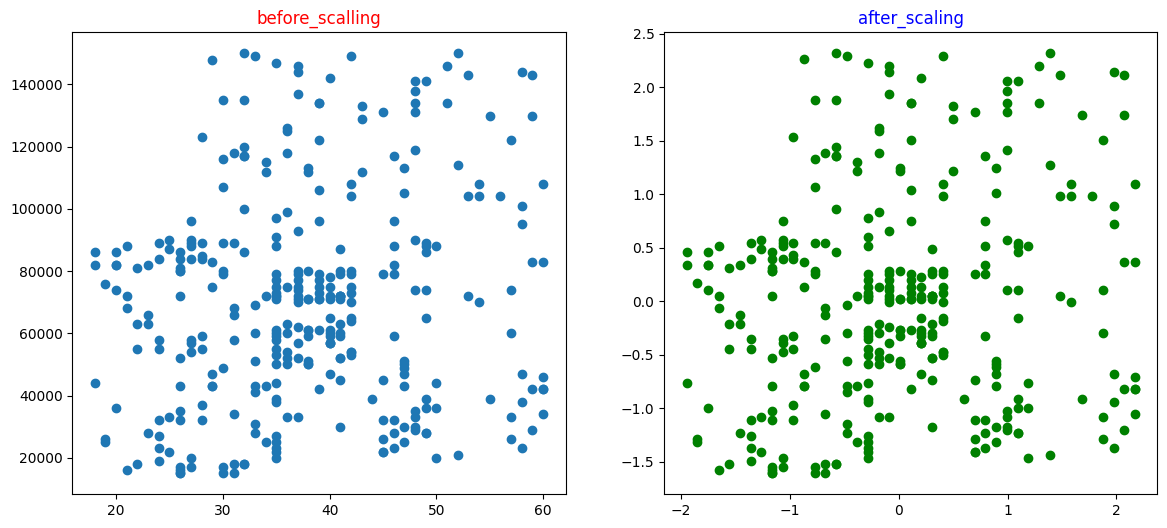

In [79]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(14,6))
ax1.set_title('before_scalling',color='red')
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax2.set_title('after_scaling',color='blue')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='green')
plt.show()

In [80]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,37.9,70281.2
std,10.2,34430.6
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [81]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


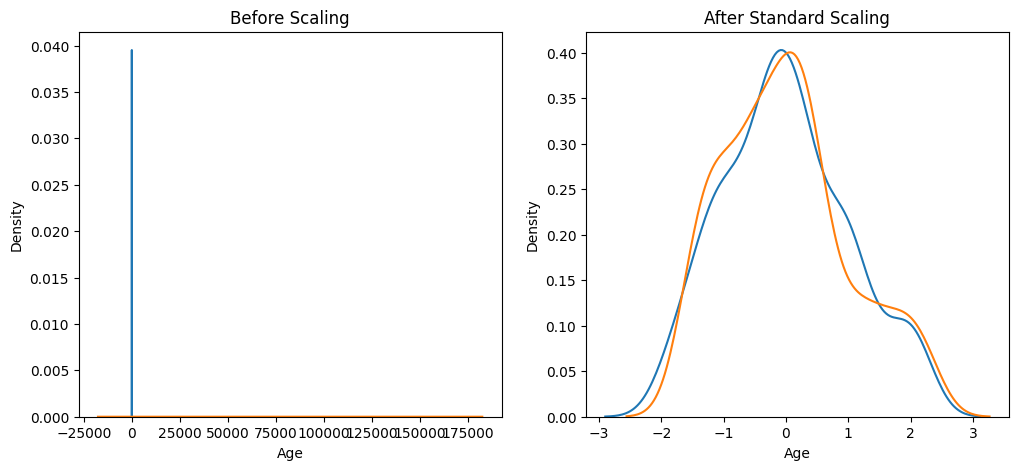

In [82]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

Comparison of Distributions

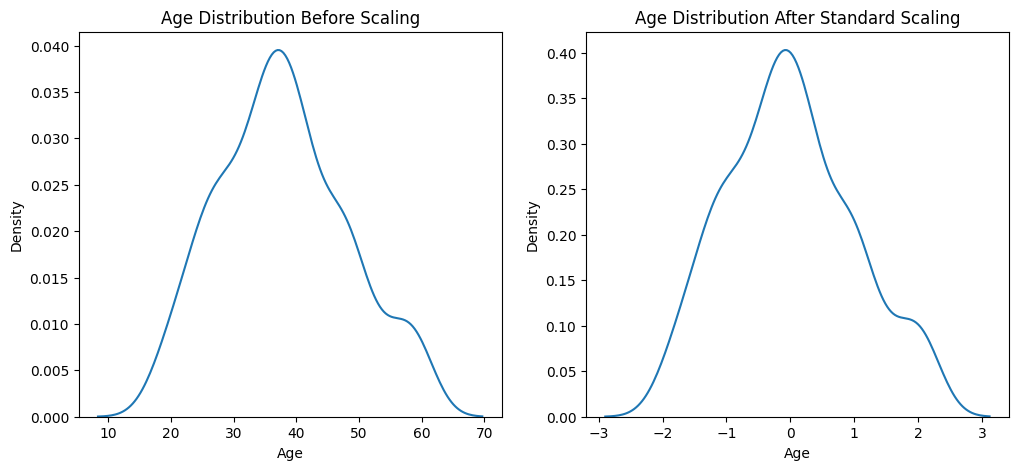

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

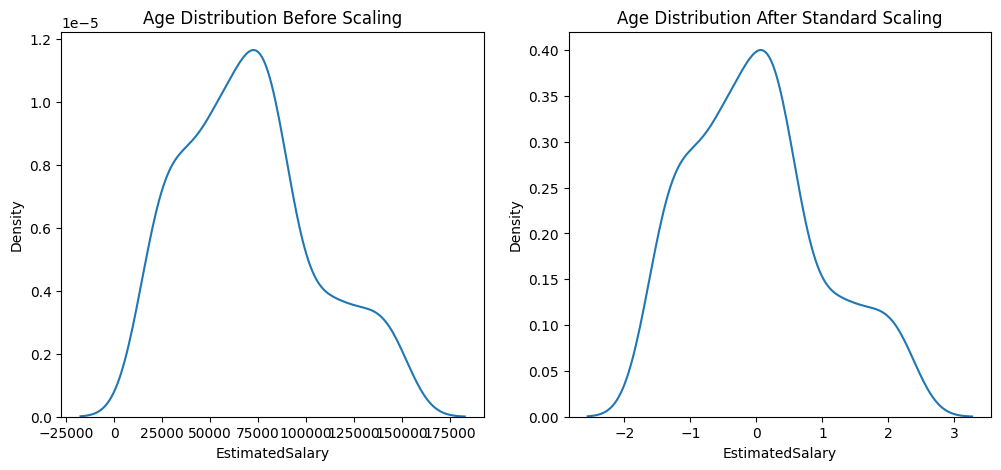

In [84]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

Why scaling is important?

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [86]:
lg=LogisticRegression()

In [87]:
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
from sklearn.metrics import accuracy_score
print('before scalling accuracy_score:-',accuracy_score(y_test,y_pred))

before scalling accuracy_score:- 0.65


In [88]:
lg.fit(x_train_scaled,y_train)
y_pred1=lg.predict(x_test_scaled)
print('after_scalling_accuracy_score:-',accuracy_score(y_test,y_pred1))

after_scalling_accuracy_score:- 0.8625


effect_of outliers
scaled are not removing outliers 
StandardScaler keep it as it was before